In [1]:
from velocity import get
from velocity.velocity_data import rotational_data
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import h5py
import csv
import os
from scipy import stats

In [2]:
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f:
    ids = f['ids'][:]

Galaxy ID: 	Galaxy Number: 


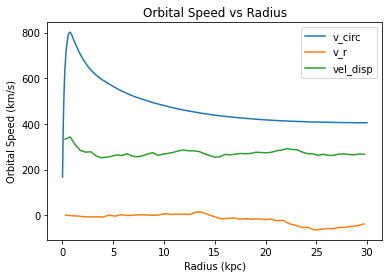

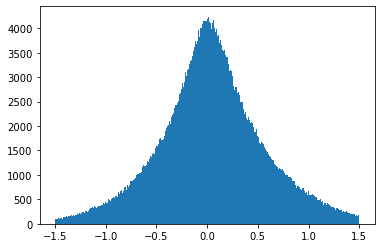

0		0.9290349


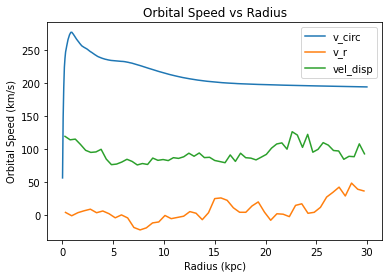

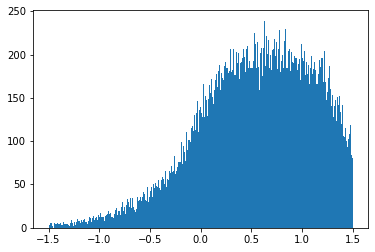

1		0.3167215


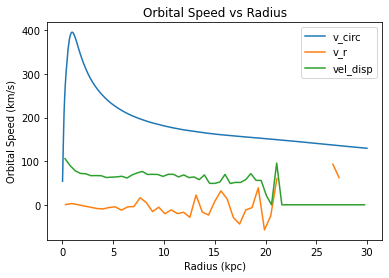

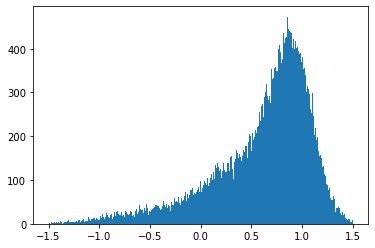

2		0.23659727


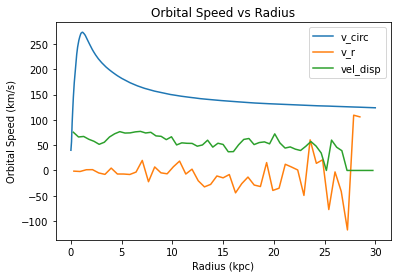

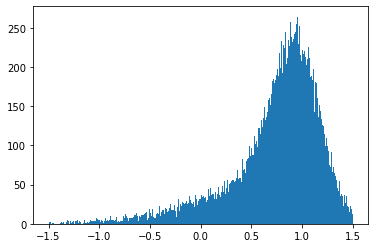

3		0.16458674


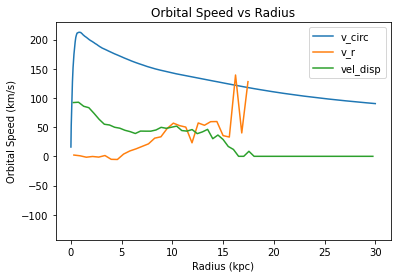

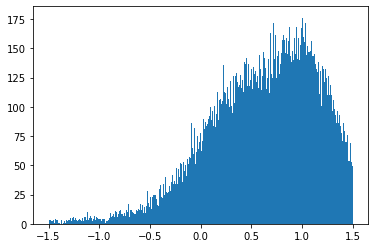

4		0.24859549


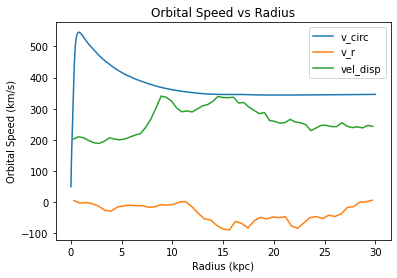

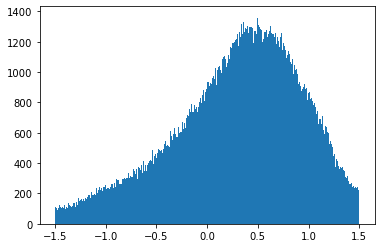

1502		0.59502167


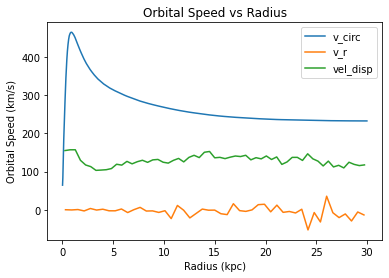

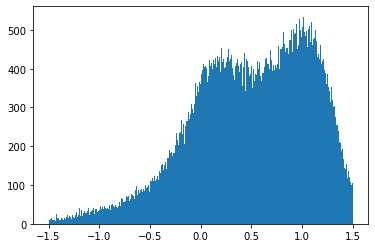

1503		0.39529392


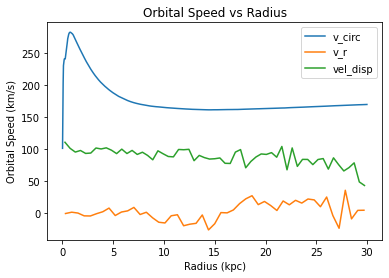

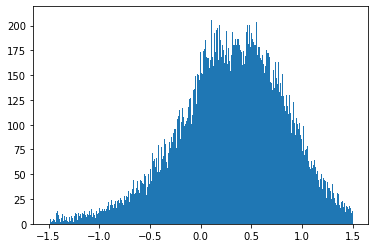

1504		0.52855814


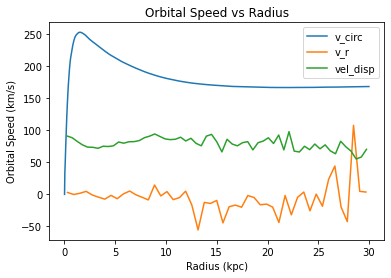

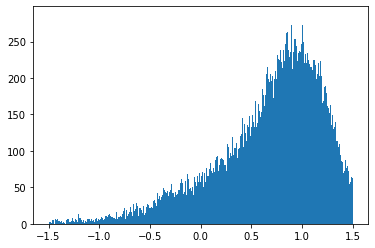

1505		0.24631128


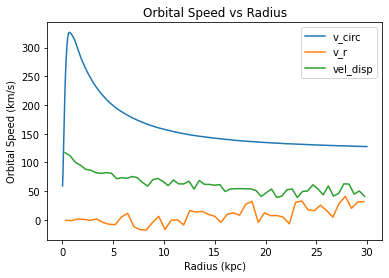

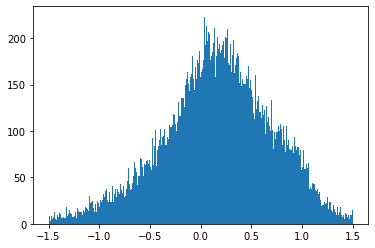

1507		0.71916175


In [4]:
print("Galaxy ID: " + "\tGalaxy Number: ")
with open('galaxy_num.csv', 'w',newline='') as f:
    fieldnames = ['Galaxy ID', 'Galaxy Number']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(10):
        id = ids[i]

        r, vel_circ, v_r, r_v_r, e_v, bins, mass_num, vel, radius = rotational_data(id)

        vel_new,r_new,x = stats.binned_statistic(radius,vel,statistic = 'std',bins = np.linspace(0,30,60))
        r_binned = (r_new[1:]+r_new[:-1])/2


        plt.plot(r,vel_circ, label = "v_circ")
        plt.plot(r_v_r,v_r, label = "v_r")
        plt.plot(r_binned,vel_new, label = "vel_disp")

        plt.legend()

        plt.xlabel("Radius (kpc)")
        plt.ylabel("Orbital Speed (km/s)")
        plt.title("Orbital Speed vs Radius")
        plt.savefig("OrbitalVel_tot.png",dpi=200)

        plt.show()

        plt.hist(e_v,bins=bins)
        plt.show()

        print(str(id) + "\t\t" + str(mass_num))

        writer.writerow({'Galaxy ID': str(id), 'Galaxy Number': str(mass_num)})
       
    f.close()